## Final Project

#### Saloni Mishra

#### Data Visualization (DS660)

#### WHO dataset visualization of different variables.

In [18]:
import pandas as pd
df1=pd.read_csv(r"C:\Users\salon\Desktop\DATA SCIENCE\DATA VISUALIZATION DS620\Final Project\WHO_Cluster.csv") # reading data

In [19]:
df=pd.read_csv(r"C:\Users\salon\Desktop\DATA SCIENCE\DATA VISUALIZATION DS620\Final Project\WHO_Cluster.csv") # again reading data

In [20]:
df2=df1.fillna(0) # removing na values

### Creating data subset of some important variables

In [12]:
dfs=df2[["ContinentName","Adult literacy rate (%)", "Gross national income per capita (PPP international $)",
         "Population annual growth rate (%)",
         "Population proportion over 60 (%)",
         "Total fertility rate (per woman)"]]  

In [14]:
dfs.rename(columns = {"Adult literacy rate (%)":"Ad_Lit",
                      "Population proportion over 60 (%)":"Over60",
                        "Gross national income per capita (PPP international $)":"GNI(PPP)",
                         "Population annual growth rate (%)":"PAGR",
                       "Total fertility rate (per woman)":"Tot_Fer" }, inplace = True)

### Data info

In [61]:
#df1.info(55)

### Interactive bubble graph

In [30]:
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objs as go

#Next, we are going to create the data points.
data=[go.Scatter(
    x=df2['Country'], y=df2['Population living below the poverty line (% living on &lt; US$1 per day)'],mode='markers', marker=dict(size=df2['Population living below the poverty line (% living on &lt; US$1 per day)']))]



In [31]:

#Then we will want to label the chart's title, x-axis, y-axis, and also set the margins of the chart.
layout = go.Layout(title='Population living below the poverty line (% living on &lt; US$1 per day)', xaxis = {'title':'Country'}, yaxis = dict(title = 'living below the poverty line'), margin=dict(l=50,r=50,b=125,t=25),hovermode='y')

#Let's create the layout and plot out the data points.
fig = go.Figure(data=data,layout=layout)


fig.show()

### In the above bubble graph, I explored countries whose population living below poverty line (% living on < US dollar one per day). Countries Cambodia, Haiti, Madagascar, Nigeria, Tanzania, Rwanda has more than 50% population living below poverty line.


In [32]:
df['Country'] = df['Country'].astype('|S') 

In [33]:
df1 = pd.read_json("world-countries.json")
df1.head()

type                                           features
0  FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Af...
1  FeatureCollection  {'type': 'Feature', 'properties': {'name': 'An...
2  FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Al...
3  FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Un...
4  FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Ar...

## Map visualization of median age using Folium

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import folium

#url = 'https://ibm.box.com/shared/static/cto2qv7nx6yq19logfcissyy4euo8lho.json'
world_geo = r'world-countries.json'
m = folium.Map(location=[0, 0], tiles='Mapbox Bright', zoom_start=2)

folium.Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df,
    columns=['id', 'Population median age (years)'],
    key_on='feature.id',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population median age (years)',
    ).add_to(m)

folium.LayerControl().add_to(m)

m

### In the above figure, I used folium for understanding Population median age (years) distribution in different countries. Here I found developed countries has highes median age than developing countries.

In [14]:
import pandas as pd
import datetime
import folium
from folium.map import *
from folium import plugins
from folium.plugins import MeasureControl
from folium.plugins import FloatImage

In [41]:
data = dict(type='choropleth',
locations = df['Country'],
locationmode = 'country names', z = df['Population (in thousands) total'],
text = df['Country'], colorbar = {'title':'Population (in thousands) total'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)

In [42]:
layout = dict(title='Population in different Countries',
geo = dict(showframe = True, projection={'type':'mercator'}, projection_type='equirectangular'))

In [37]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline
#import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

## Map visualization with Plotly

In [43]:
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

### In the above visualization, population total distribution in all countries to understand the population distribution. For this, I used plotly library and map for visualization.

## Literacy rate vs Gross National income in different continents

### Using Plotly Express

In [15]:
import plotly_express as px

In [16]:
fig=px.scatter(df2, y = 'Gross national income per capita (PPP international $)', x = 'Adult literacy rate (%)', size_max=90,hover_name="Country", color = 'ContinentName', marginal_y="histogram", marginal_x="histogram")
fig.show()

### The above plot is interactive in between different continents. On x axis is Adult literacy rate (%) whereas on y axis gross national income per capita (PPP international in USD). As the adult literacy is higher, the countries have better gross national income per capita.

In [17]:
import matplotlib.pyplot as plt


In [47]:
%matplotlib notebook
%matplotlib notebook

## Scatter Interactive Chart

<IPython.core.display.Javascript object>


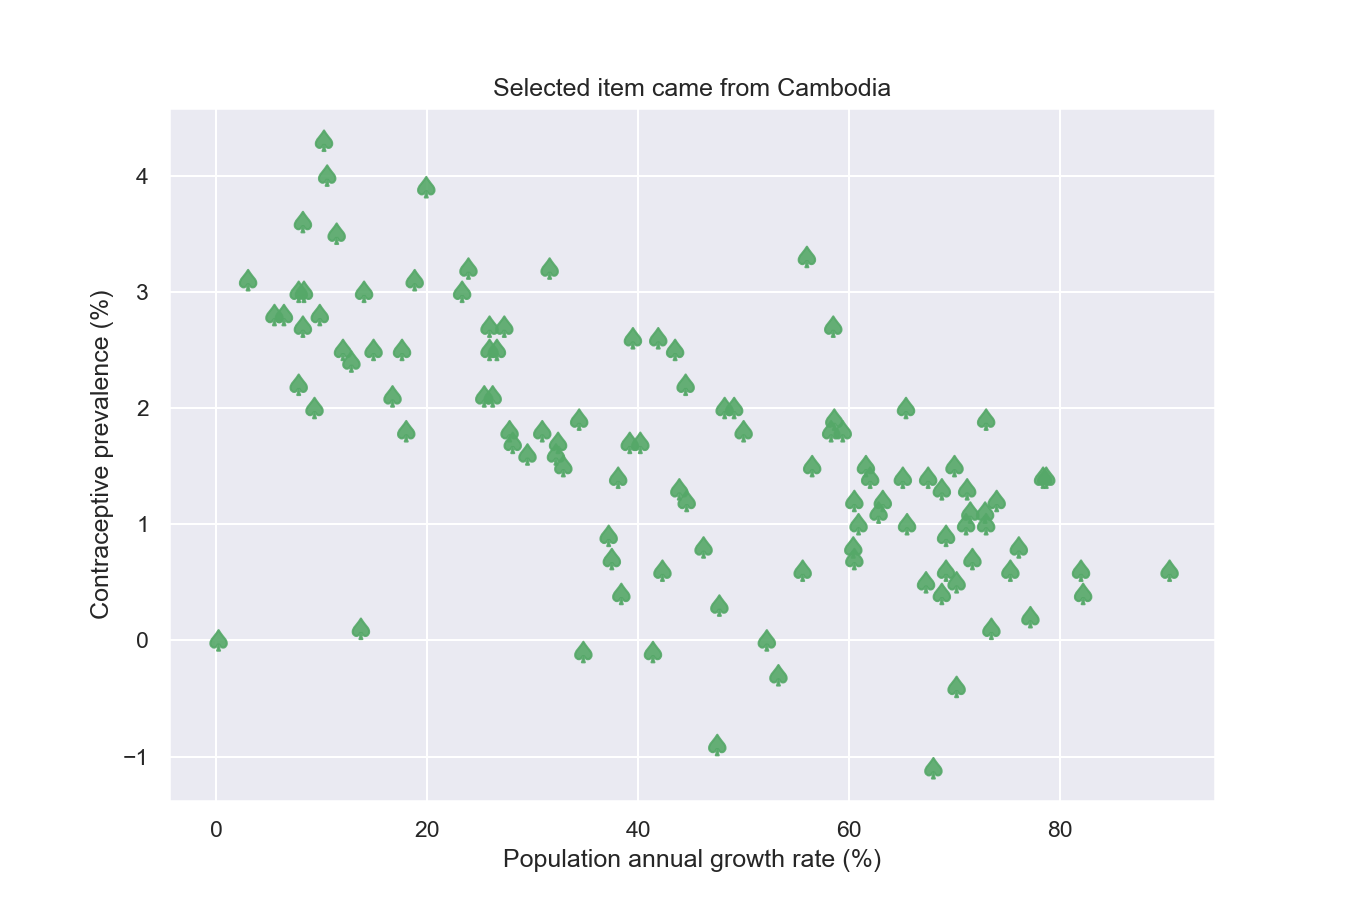

In [42]:
%matplotlib notebook
import matplotlib.pyplot as plt


f=plt.figure( figsize=(9, 6))
# picker 5 value means mouse doesn't have to click directly on an event, but can be upto 5 pixels away
s=plt.scatter(df['Contraceptive prevalence (%)'],df['Population annual growth rate (%)'],c="g", alpha=0.9, marker=r'$\spadesuit$',
            s=100, picker=5)
plt.gca().set_ylabel('Contraceptive prevalence (%)')
plt.gca().set_xlabel('Population annual growth rate (%)')
def onpick(event):
    origin=df.iloc[event.ind[0]]['Country']
    plt.gca().set_title("Selected item came from {}".format(origin))  
plt.gcf().canvas.mpl_connect('pick_event', onpick)
s.set_urls(['https://www.cdc.gov/nchs/fastats/contraceptive.htm', 'http://www.google.com', None])
f.savefig('sr.svg')

### Above is interactive scatter plot between contaceptive prevalance and population annual growth rate(%), I found that countries with higher contraceptive prevalance has less population annual growth rate.

## Animation of four different variables in different countries

In [49]:
import plotly.express as px
import plotly.graph_objs as go


fig = px.scatter(df2, x="Adult mortality rate (probability of dying between 15 to 60 years per 1000 population) both sexes", y="Physicians density (per 10 000 population)", animation_frame="ContinentName",
           size="Population (in thousands) total",color="Per capita government expenditure (US$)", hover_name="Country",size_max=80, range_x=[0, 600], range_y=[-6,60], animation_group="Country")
fig.update_layout(legend_orientation="h") 

fig.show()



### Above graph is an animation explanation in between "Adult mortality rate (probability of dying between 15 to 60 years per 1000 population) both sexes" and "physician density (per 10000 populaion) taking into account "per capita government expenditure in (USD) across different continents. I found that as physician density increases adult mortality decreases moreover government health expenditure also reduces the adult mortality rate.

## Interactive chart of People living with HIV infection vs Deaths associated

In [46]:
import plotly.express as px
px.scatter(data_frame=df2
           , x="People_living_with_HIV"
           , y="Deaths due to HIV/AIDS (per 100 000 population per year)"
           , color="ContinentName"
           , title='HIV-infection'
           , marginal_x='histogram'
           , marginal_y='box'
           , hover_name='Country'
           , opacity=0.2
           , template='seaborn'
          )

### Above is scatter plot with marginal box plot and marginal histogram. Taking "People_living_with_HIV" and "Deaths due to HIV/AIDS (per 100 000 population per year)". into consideration. Even though countries with better estimates of population parameters are not doing better than some developing countries. Although death due to HIV is less but population living with HIV is high specially in some countries of  Africa and Northern America continents.

## Voilin Plot

In [83]:
import plotly.express as px
px.violin(data_frame=df
          , x="ContinentName"
          , y="Prevalence of tuberculosis (per 100 000 population)"
          
          
          , title="Distribution of Prevalance of Tuberculosis in Different Continents"
          )


### Above is interactive voilin plot, it is in between Continents and Prevalance of tuberculosis. North America and Europe has very low tuberculosis prevalance where as Asia has highest then Africa and then Australia.

## Sunburst Visualization

In [52]:
import plotly.express as px
import numpy as np

#Healthy life expectancy (HALE) at birth (years) both male& female

fig = px.sunburst(df, path=['ContinentName', 'Country'], values='HALE',
                  color='ContinentName', hover_data=['Country'],
                  color_continuous_scale='RdBu')
fig.show()

## Swarm with box plot

In [89]:
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>


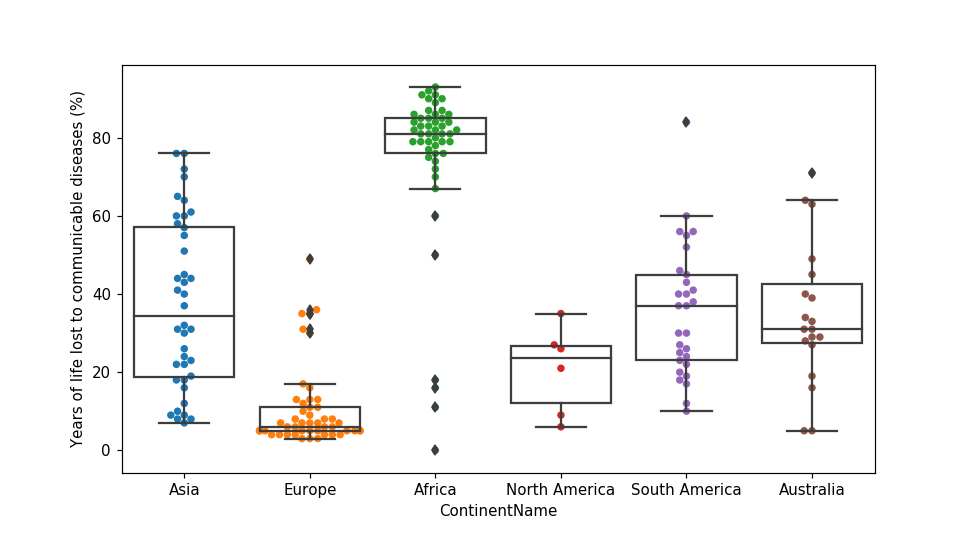

In [90]:

%matplotlib notebook
import seaborn.apionly as sns 
plt.rcParams['figure.figsize']=(9,5)

sns.boxplot("ContinentName", "Years of life lost to communicable diseases (%)", data=df, boxprops={'facecolor':'None'})
sns.swarmplot("ContinentName", "Years of life lost to communicable diseases (%)", data=df, zorder=.5);

### Above is Swarmplot, plotted by Seaborn. In this, I took variable "years of life lost to communicable diseases (%)" and Continents. in this we can see that Africa has highest percentage of years of life lost to communicable diseases, whereas Asia is in second. Europe has least.

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

## Jointgrid Visualization

<IPython.core.display.Javascript object>


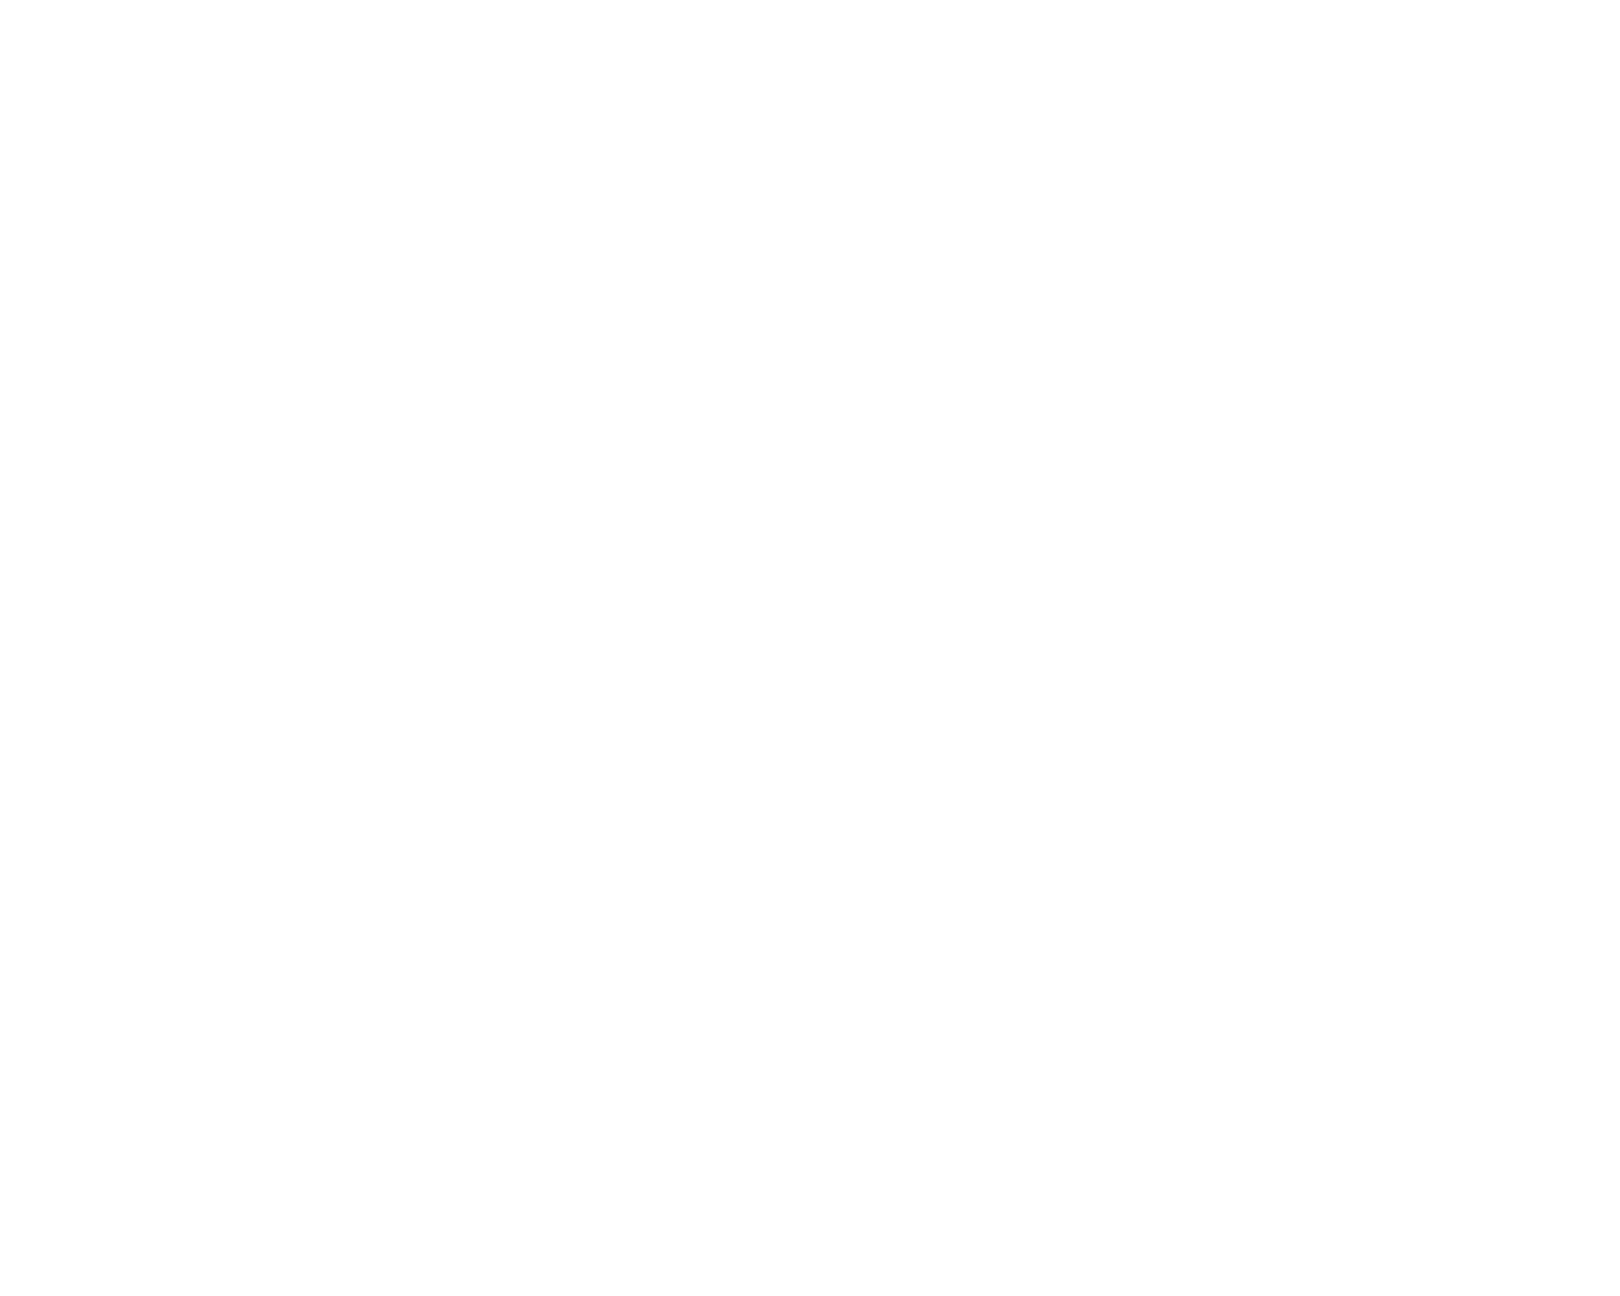

<IPython.core.display.Javascript object>


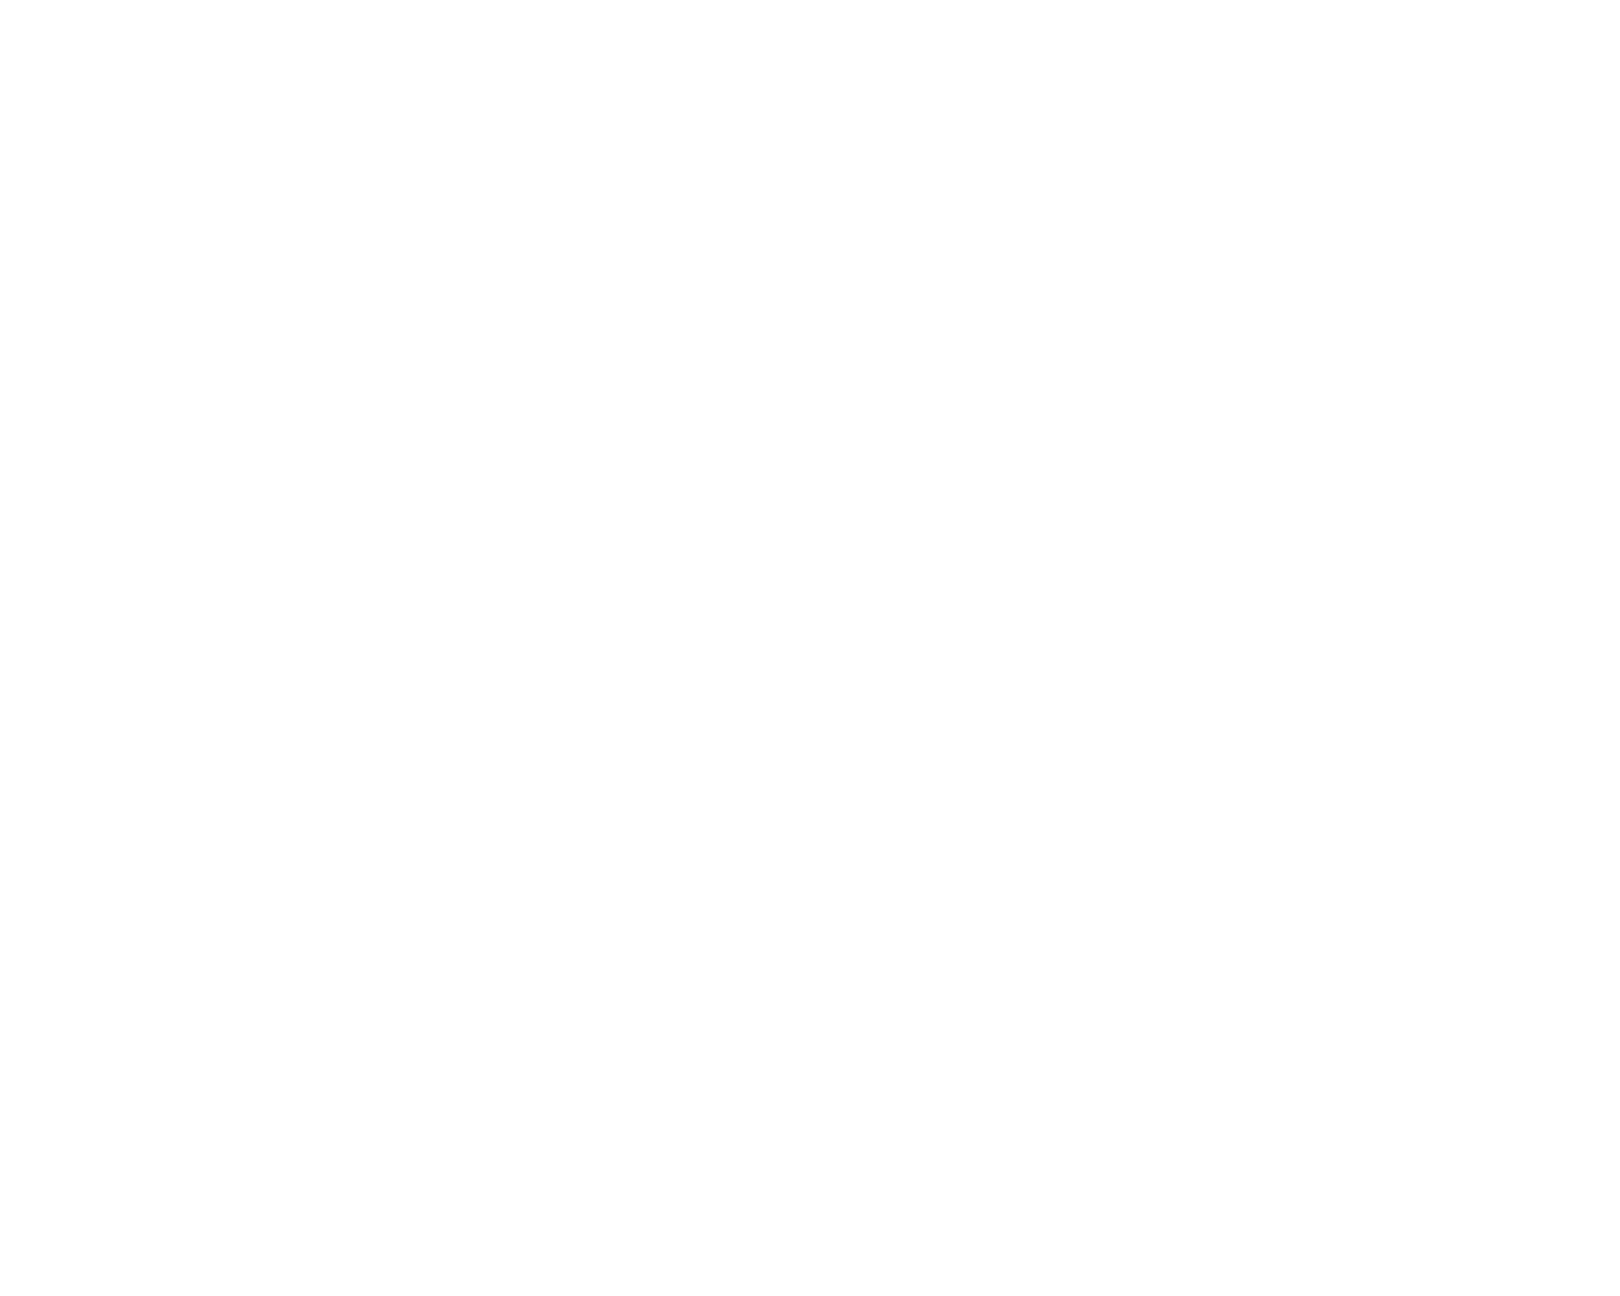

<IPython.core.display.Javascript object>


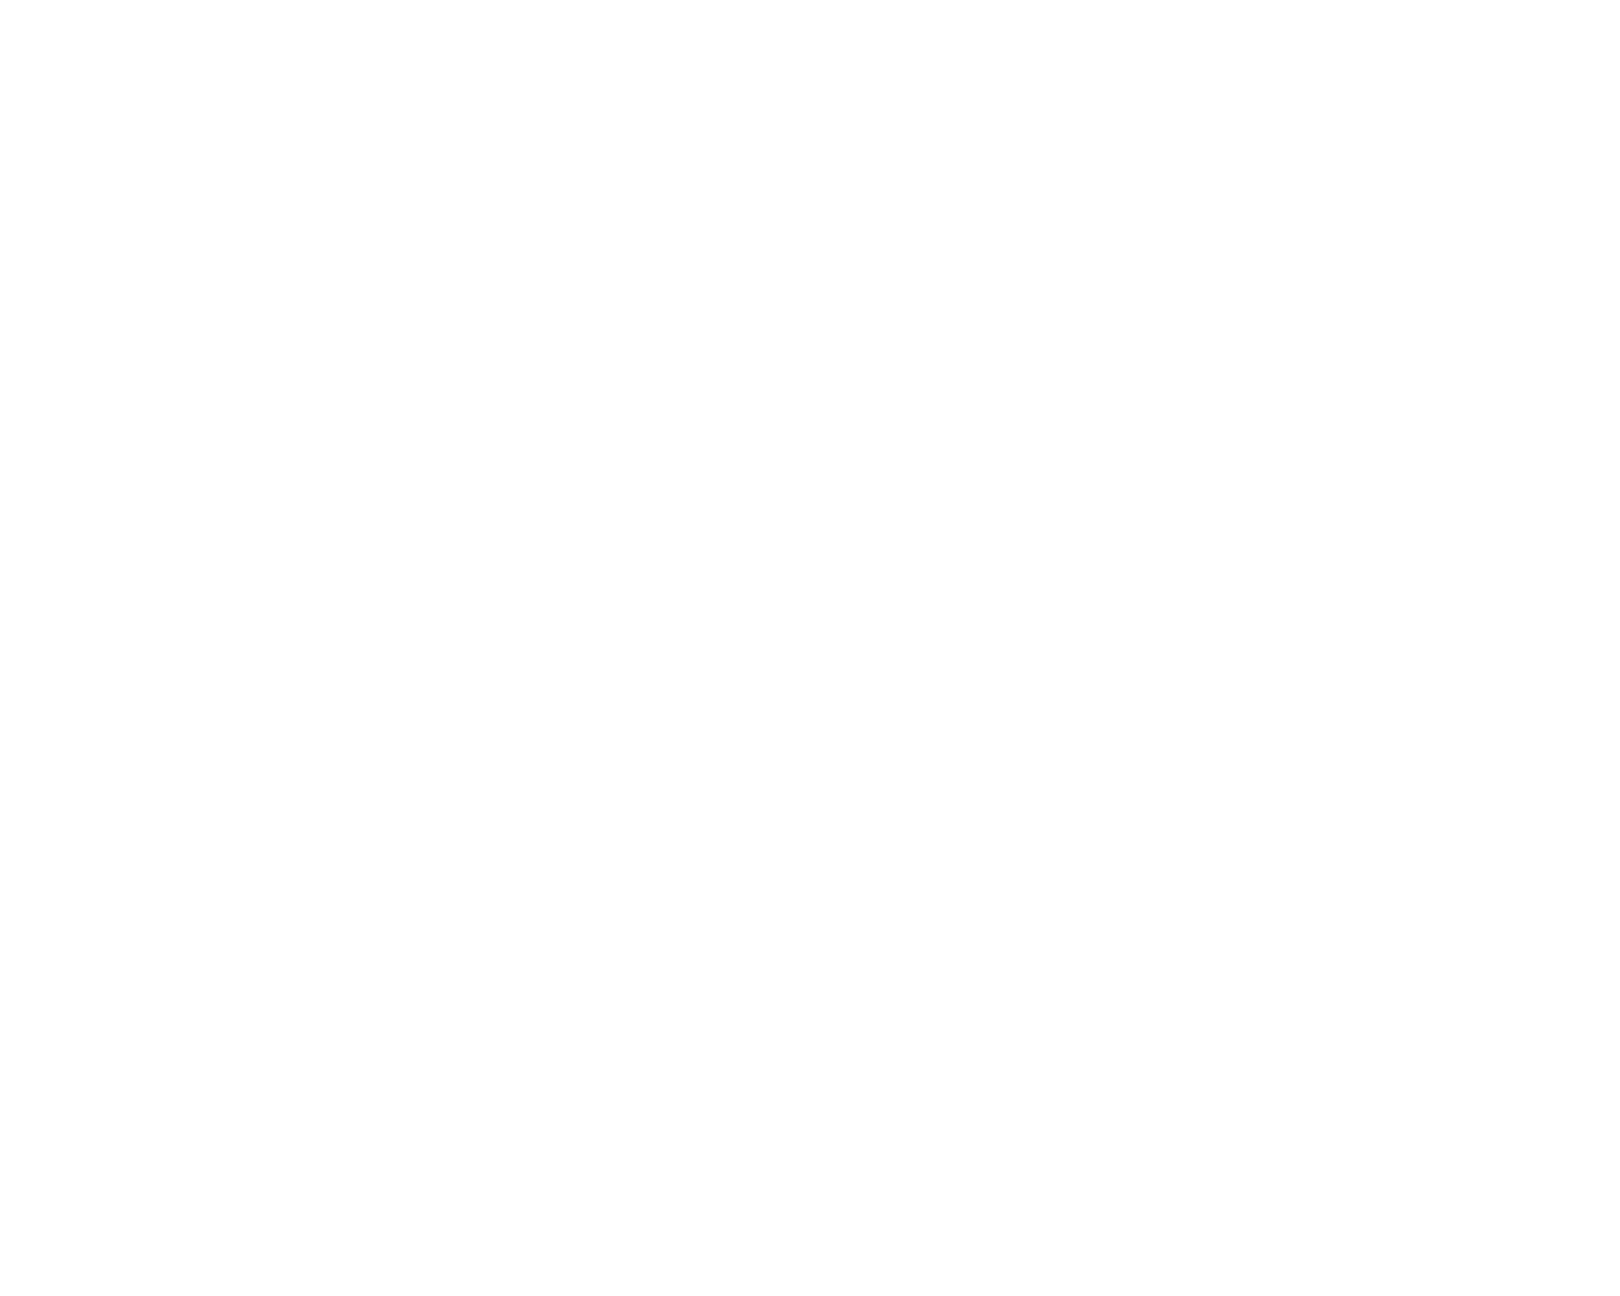

<IPython.core.display.Javascript object>


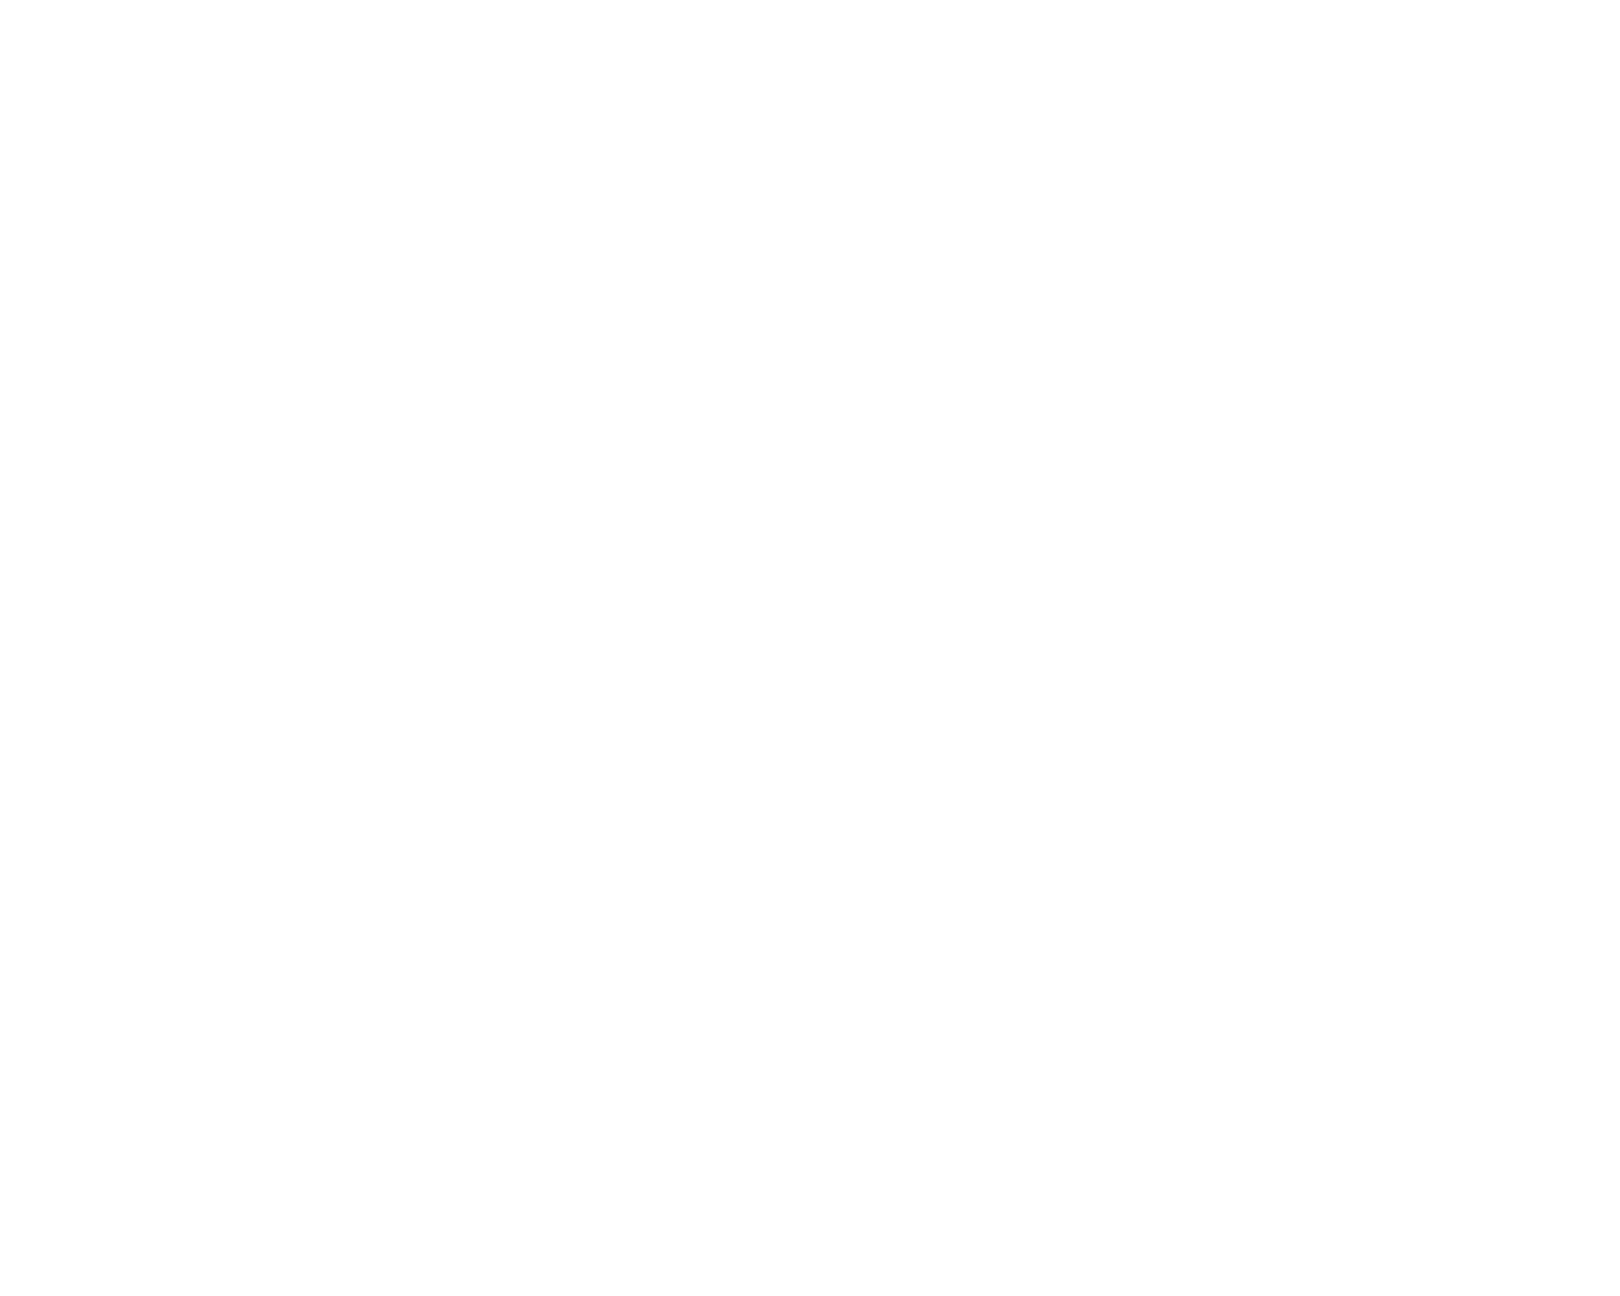

<IPython.core.display.Javascript object>


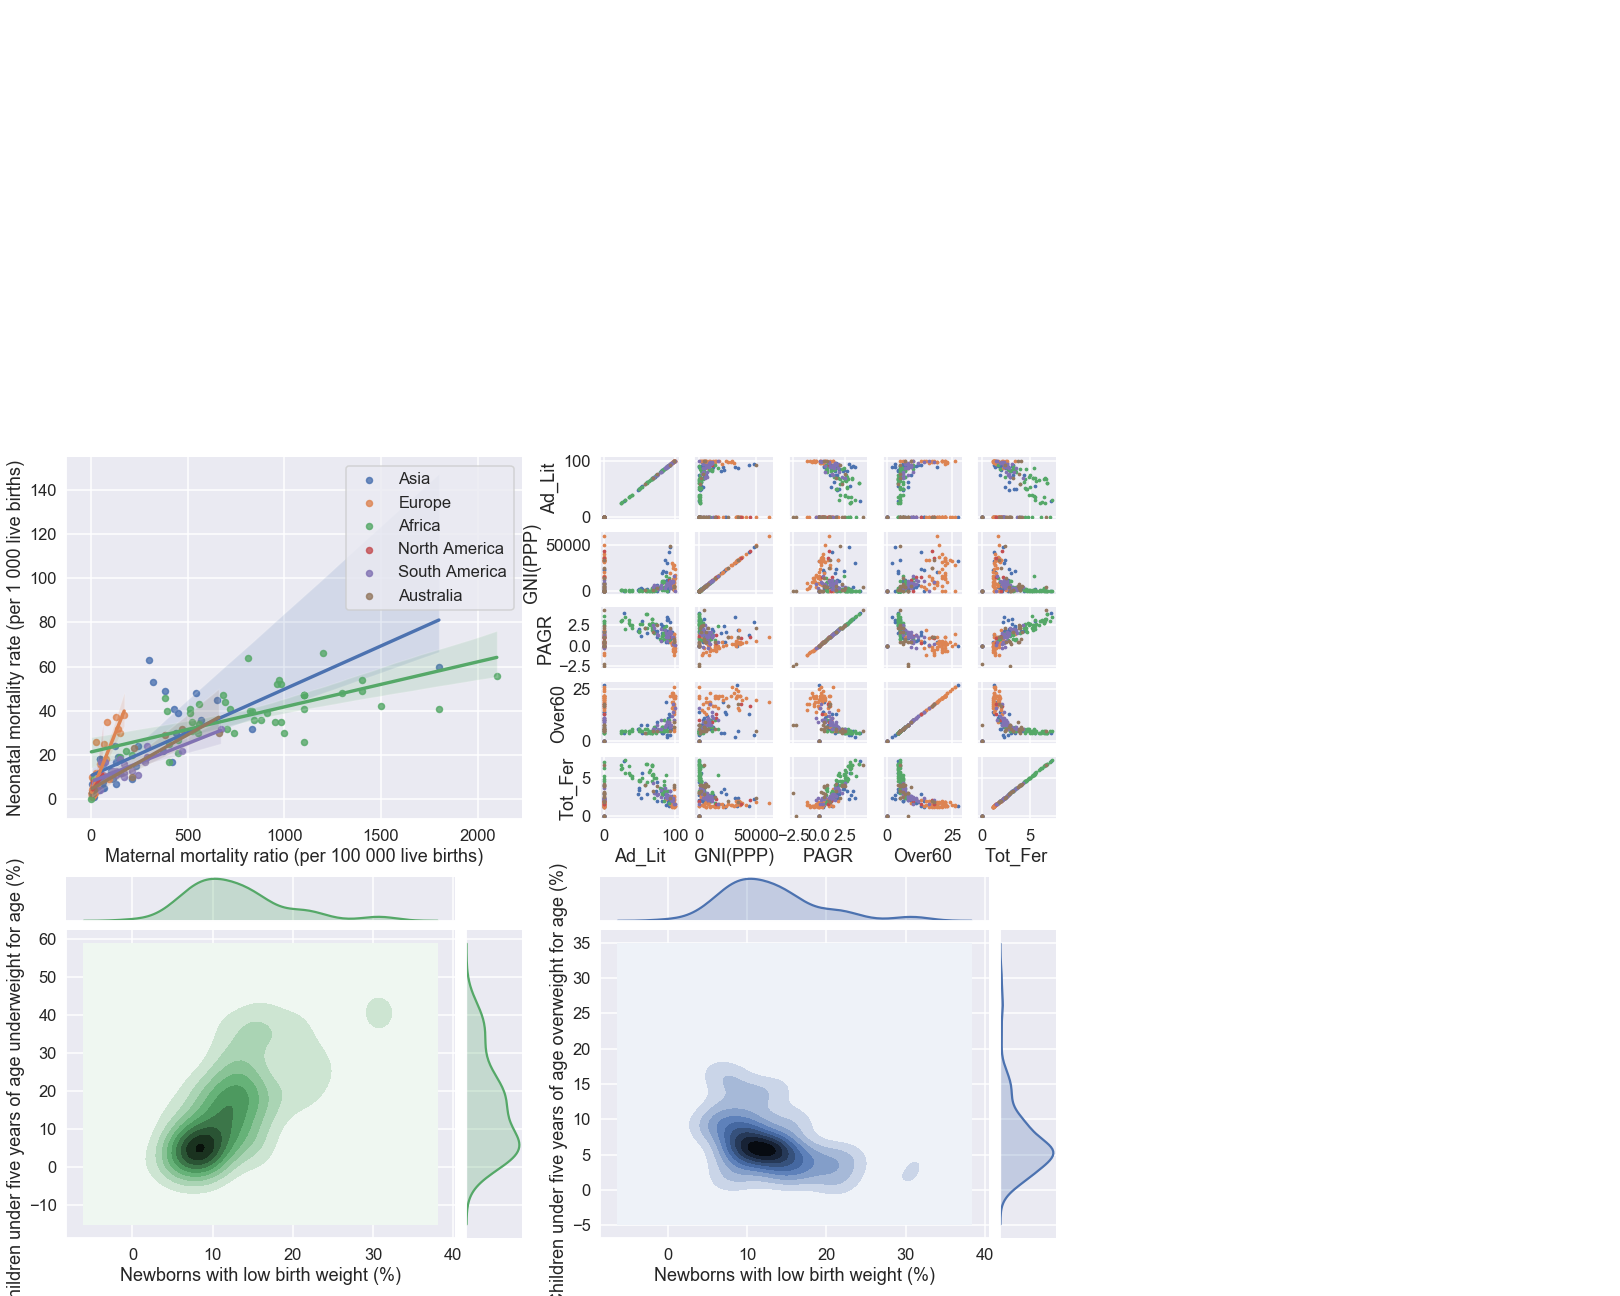

In [93]:
%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
palette = sns.color_palette("bright", 10)

# An lmplot
g0 = sns.lmplot(x="Maternal mortality ratio (per 100 000 live births)", y="Neonatal mortality rate (per 1 000 live births)",
                hue="ContinentName", data=df, 
                legend='full')
g0.axes[0][0].legend()
# A PairGrid
g1 = sns.PairGrid(dfs, hue="ContinentName")
g1.map(plt.scatter, s=5)
# A FacetGrid

# A JointGrid
g2= sns.jointplot(data=df,x="Newborns with low birth weight (%)", y='Children under five years of age underweight for age (%)', kind="kde", color="g")
g3 = sns.jointplot(data=df,x="Newborns with low birth weight (%)", y='Children under five years of age overweight for age (%)', kind="kde")


fig = plt.figure(figsize=(15,12))
gs = gridspec.GridSpec(2, 2)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
mg2 = SeabornFig2Grid(g2, fig, gs[2])
mg3 = SeabornFig2Grid(g3, fig, gs[3])

gs.tight_layout(fig, pad=2)
#gs.update(top=0.7)

plt.show()
plt.savefig(r"C:\Users\salon\Desktop\DATA SCIENCE\DATA VISUALIZATION DS620\Final Project\a.png")

### Above is the jointgrid. In this, I made regression plot, pair grid and contour plots.  In regression plot, I found that neonatal mortality rate is correlated with maternal mortality ratio. Africa and Asia has highest maternal mortality ratio and neonatal mortality rate. Different scatter plot is made between different variables in pair grid. Contour plots with marginal histograms shows that countries with neonatal low birth weight has more percentage of children under five years of age who are underweight. 

## Interactive Scatter Plot with hyperlink

In [62]:
%matplotlib notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


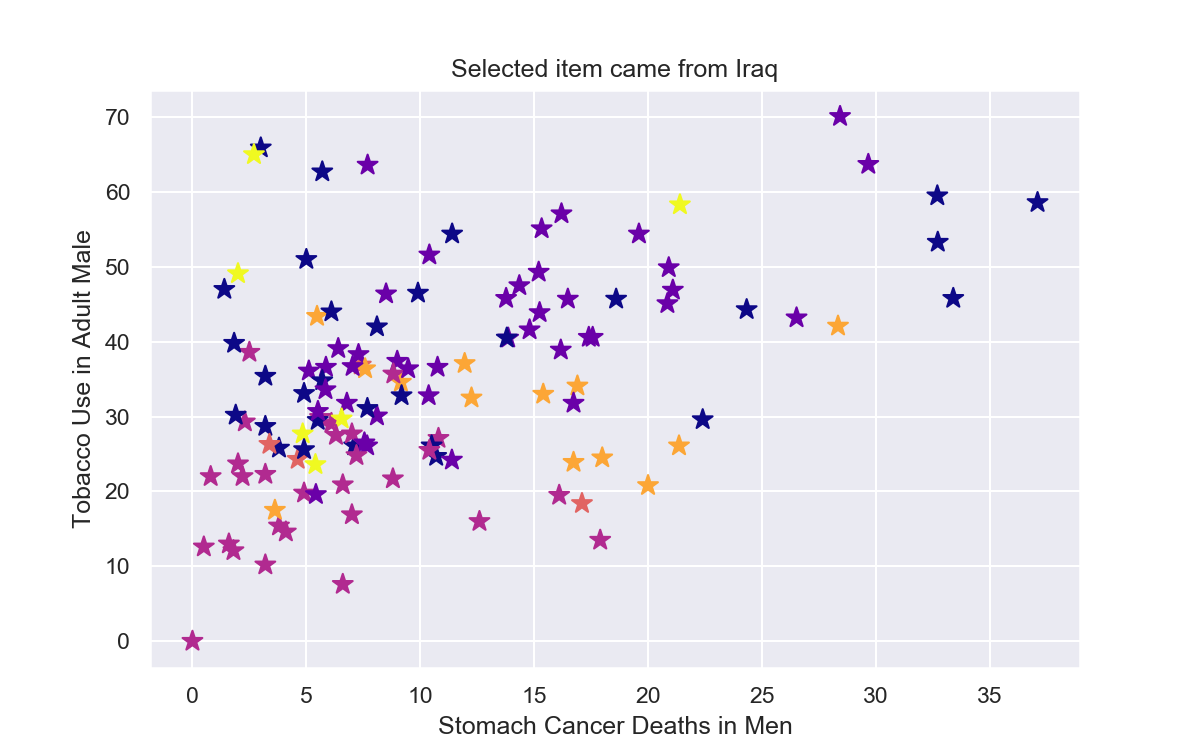

In [39]:

import matplotlib.pyplot as plt

f = plt.figure(figsize=(8, 5))
x=df1["Stomach_cancer_deaths_per_100_000_men"]
y=df1["Prevalence of current tobacco use among adults (&gt;=15 years) (%) male"]
color=df1["Continent"]
s=plt.scatter(x,y, c=color, cmap='plasma', marker="*", s=100,picker=5)
plt.show()
plt.title("Tobacco Use and Stomach Cancer Risk")
plt.xlabel("Stomach Cancer Deaths in Men")
plt.ylabel("Tobacco Use in Adult Male")
def onpick(event):
    origin=df1.iloc[event.ind[0]]['Country']
    plt.gca().set_title("Selected item came from {}".format(origin))  
plt.gcf().canvas.mpl_connect('pick_event', onpick)

s.set_urls(['https://www.cancer.org/cancer/stomach-cancer/causes-risks-prevention/risk-factors.html', 'http://www.google.com', None])
f.savefig('scatter.svg')

### Above is scatter plot between Stomach cancer deaths in men and tobacco use in adult males. Showing moderate correlationbetween them. This graph is saved in .svg format and hyperlinked with a website which states tobacco use increases stomach cancer risk. 

## Bokeh Plot

In [21]:
from bokeh.plotting import figure, show
#from bokeh.sampledata.iris import flowers
from bokeh.transform import factor_cmap, factor_mark
from bokeh.palettes import Spectral6
from bokeh.models import ColumnDataSource, FactorRange


ContinentName = ['Asia', 'Africa', 'South America', "North America", "Australia", "Europe"]
MARKERS = ['hex', 'circle_x', 'triangle','diamond', 'diamond_cross', "inverted_triangle" ]

source = ColumnDataSource(data=df1)
tools = ["box_select", "hover", "reset"]

p = figure(title = "Breast cancer deaths vs Mammography", tools="hover", tooltips="@Country")
p.xaxis.axis_label = 'Breast Cancer Deaths'
p.yaxis.axis_label = 'Women who had Mammography'

p.annulus("Breast_cancer_deaths_per_100_000_women", "Women who have had mammography (%)", source=source, legend="ContinentName", fill_alpha=0.4, inner_radius=0.2, outer_radius=0.4,
          #marker=factor_mark('ContinentName', MARKERS, ContinentName),
          color=factor_cmap('ContinentName', 'Category10_6', ContinentName))
p.legend.location = "top_left"
show(p)

### Above Bokeh plot opened in html, I saved the plot and will attached in blackboard. In this, I used Bokeh to make plot in between "Breast_cancer_deaths_per_100_000_women" vs "Women who have had mammography (%)". There is no associated relationship in between the variables. European countries have more mammography percentage and high Breast_cancer_deaths. Few Asian and African countries also have high percentage of Breast cancer deaths.

# Clustering: K-Means

In [51]:
import pandas as pd
dn=pd.read_csv(r"C:\Users\salon\Desktop\DATA SCIENCE\DATA VISUALIZATION DS620\Final Project\data.csv")
dn.head()

Country ContinentName  \
0  Afghanistan          Asia   
1      Albania        Europe   
2      Algeria        Africa   
3      Andorra        Europe   
4       Angola        Africa   

   Per capita government expenditure on health (PPP int. $)  \
0                                                  8          
1                                                127          
2                                                146          
3                                               2054          
4                                                 61          

   Adult mortality rate (probability of dying between 15 to 60 years per 1000 population) female  \
0                                                443                                               
1                                                103                                               
2                                                122                                               
3                                                 45                                               
4                                                447                                               

   Adult mortality rate (probability of dying between 15 to 60 years per 1000 population) both sexes  
0                                                473                                                  
1                                                137                                                  
2                                                135                                                  
3                                                 74                                                  
4                                                493

In [52]:
X=dn.loc[:,["Per capita government expenditure on health (PPP int. $)","Adult mortality rate (probability of dying between 15 to 60 years per 1000 population) both sexes"]].values

In [53]:
from sklearn.cluster import KMeans
wcss=[]

In [54]:
for i in range (1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [55]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
X_std = StandardScaler().fit_transform(X)



<IPython.core.display.Javascript object>


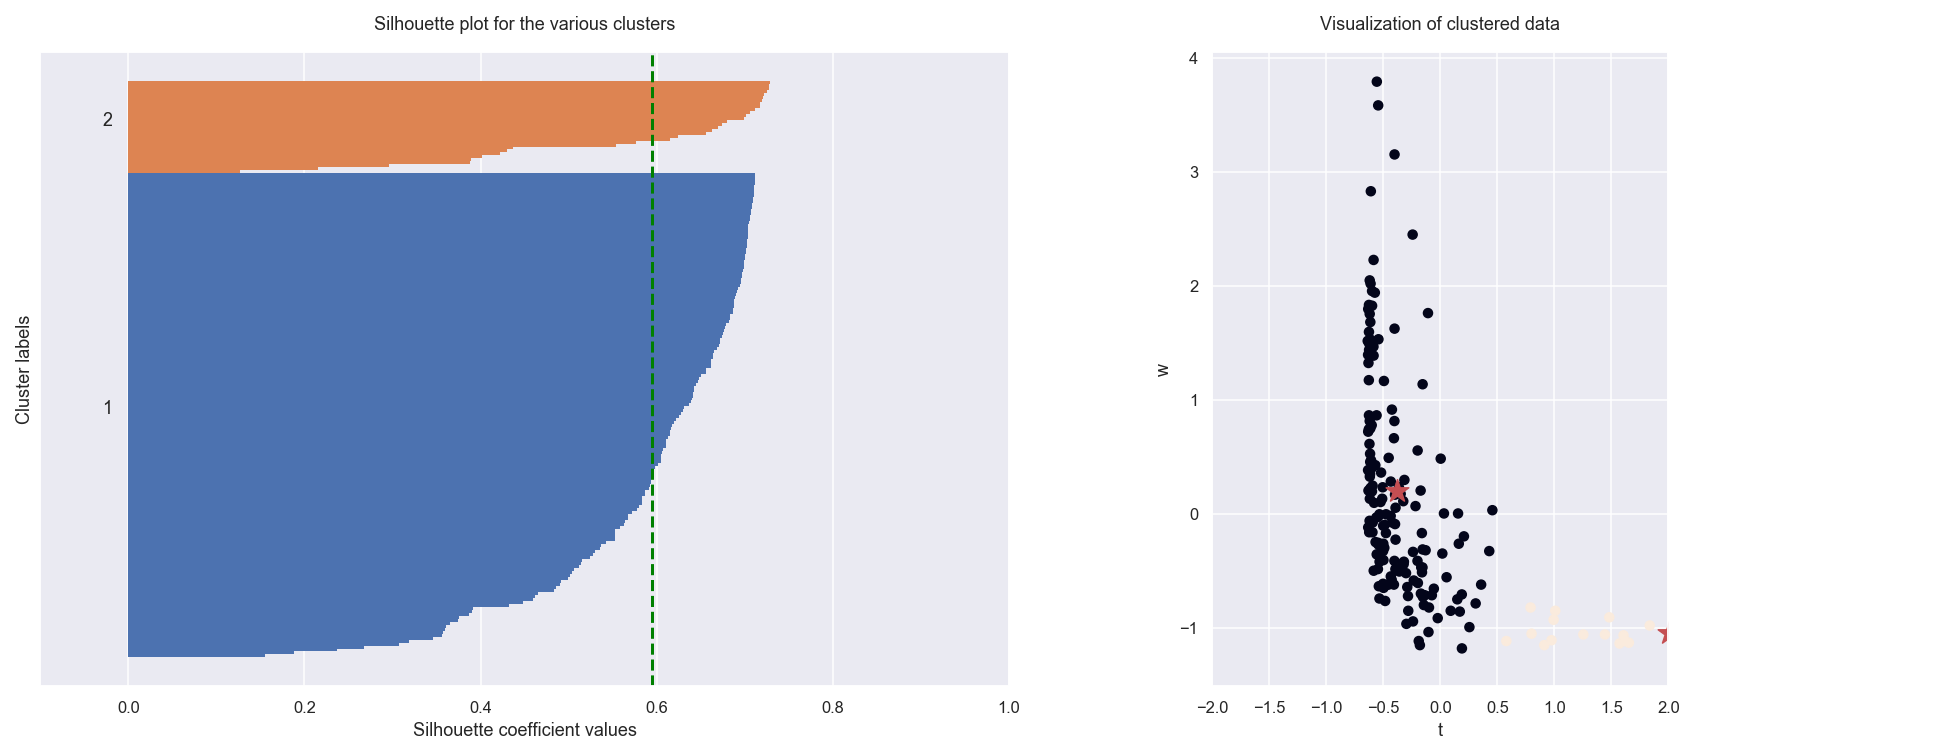

<IPython.core.display.Javascript object>


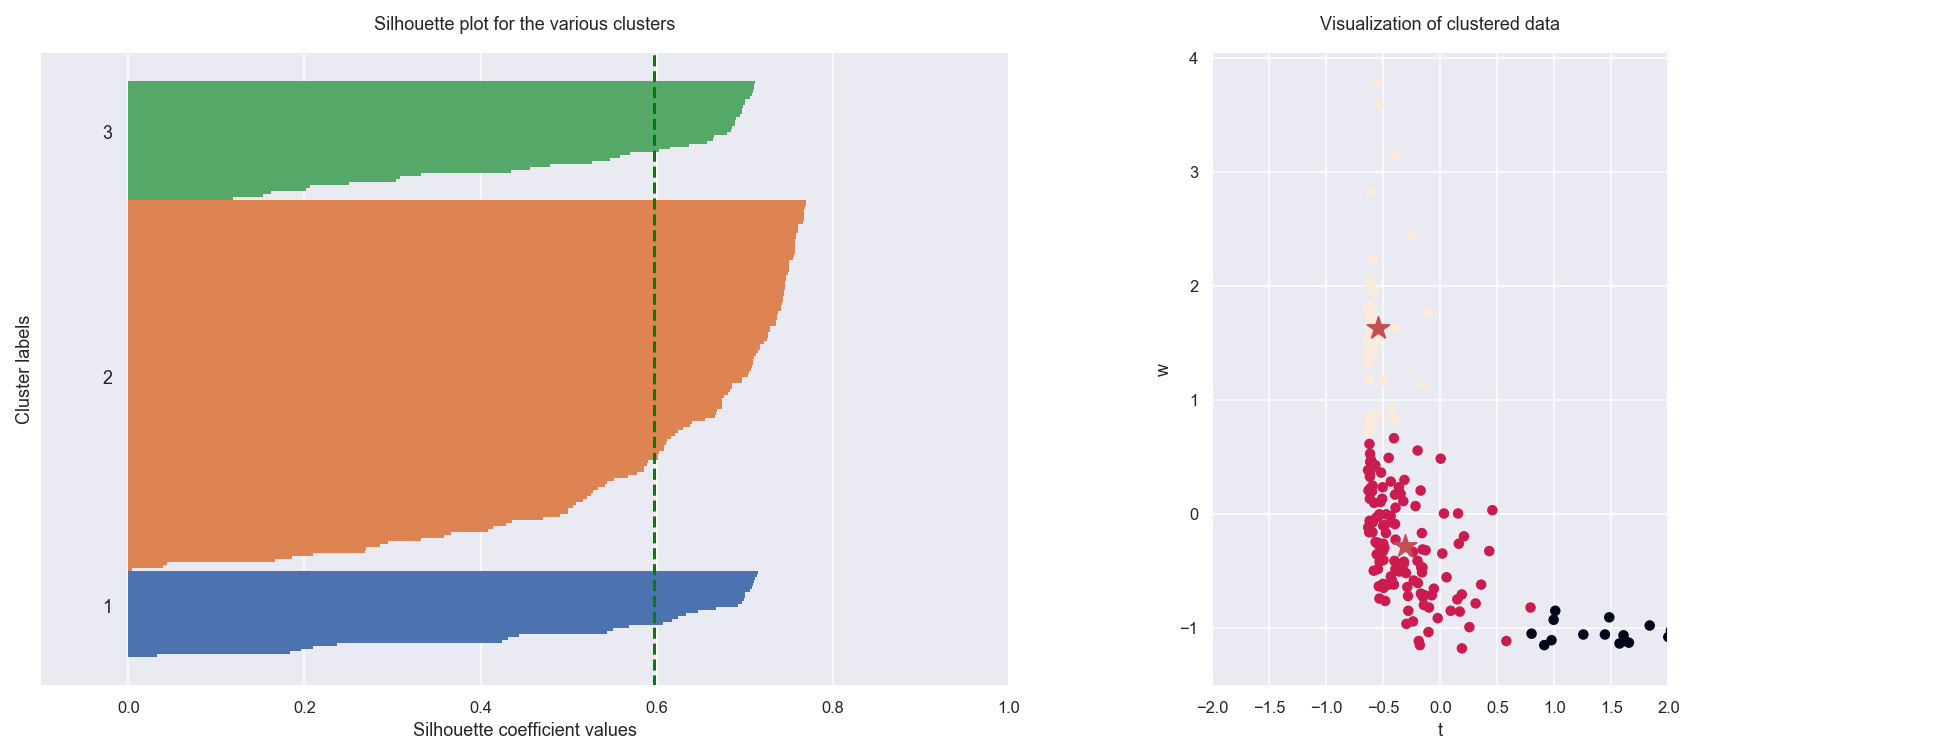

<IPython.core.display.Javascript object>


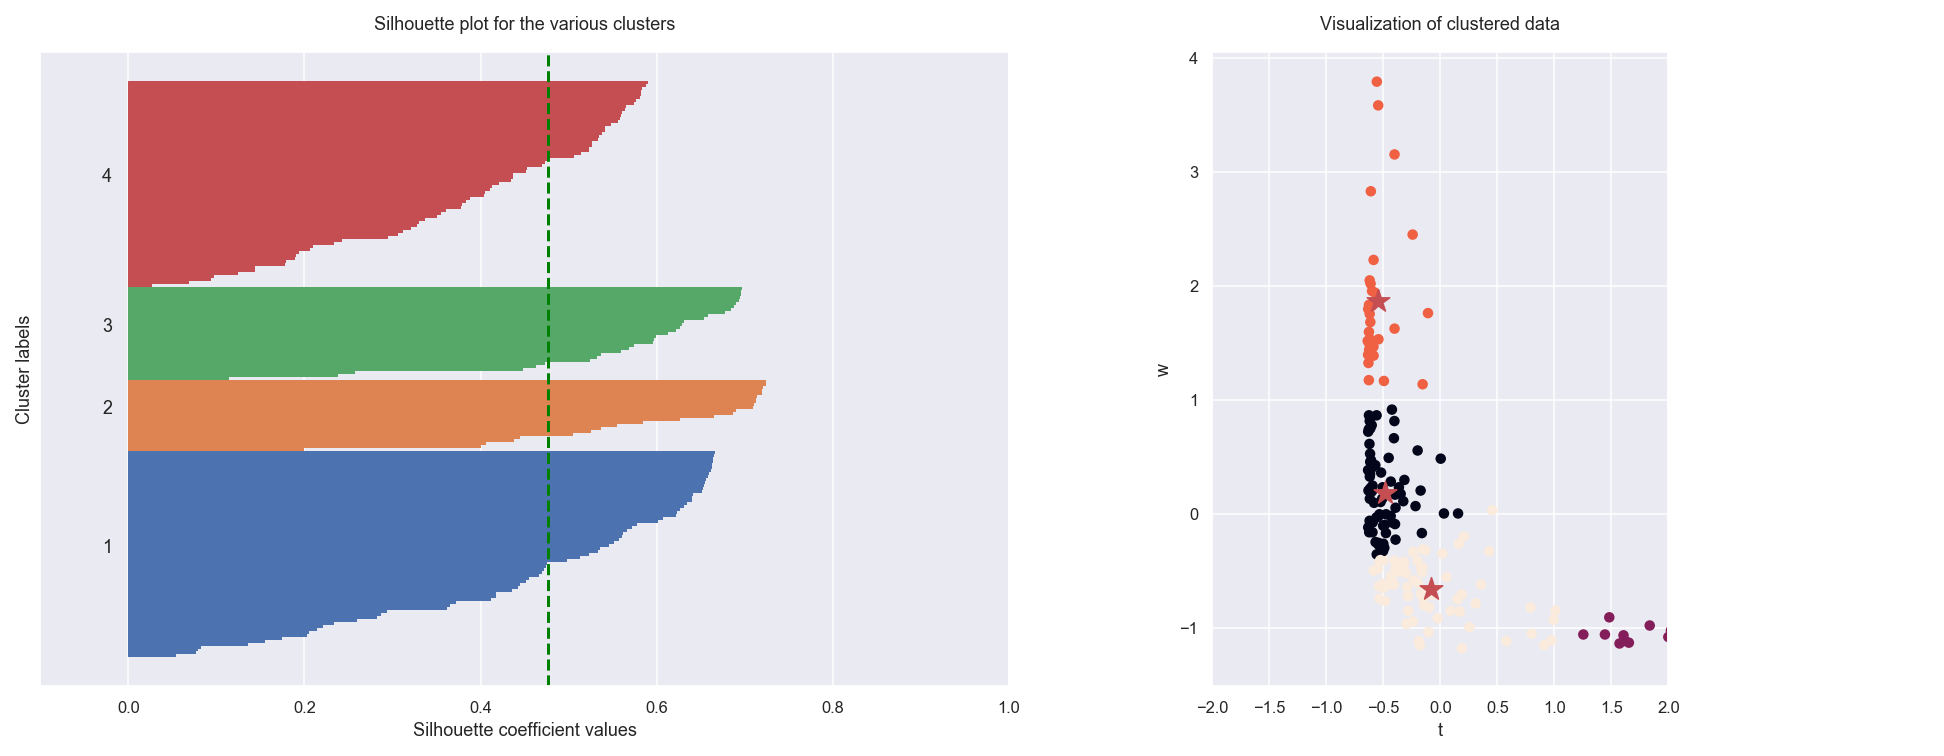

In [76]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('t')
    ax2.set_ylabel('w')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);


### Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters. Silhoutte coefficient value is 0.6 for cluster 2 and 3, 0.5 for cluster 4. As cluster 4 shows better distribution too and coefficients has not that different therefore,  I took 4 clusters for further analysis.


<IPython.core.display.Javascript object>


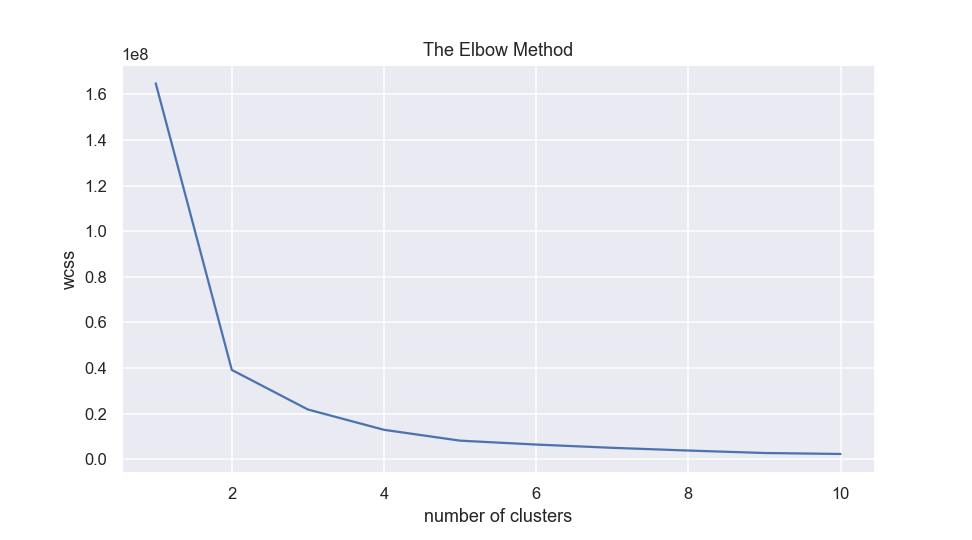

In [71]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [56]:
kmeansmodel=KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans=kmeansmodel.fit_predict(X)

<IPython.core.display.Javascript object>


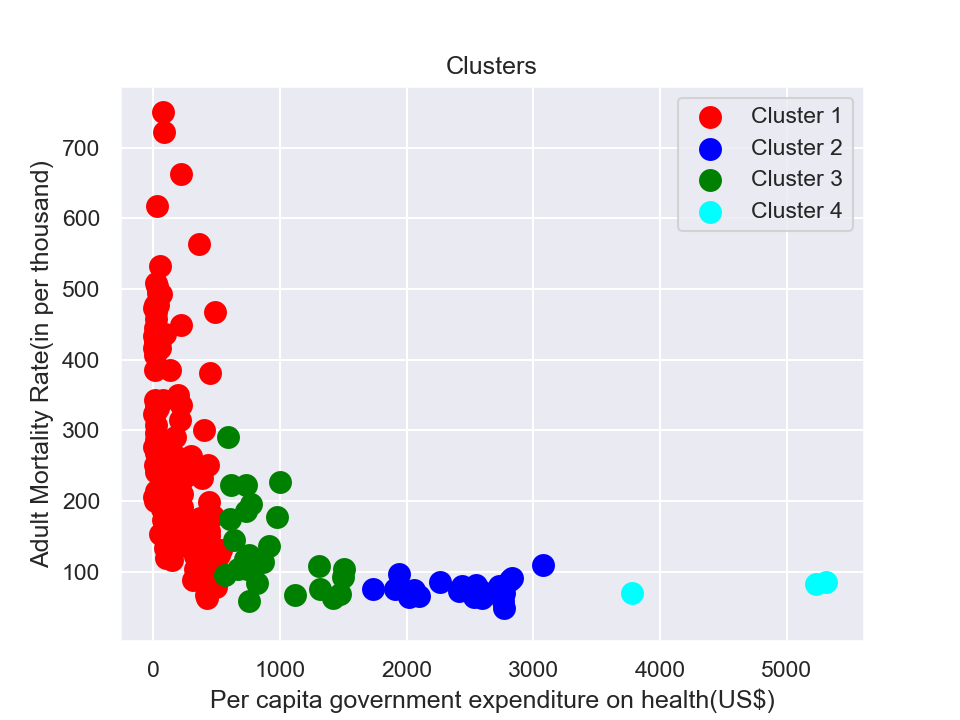

In [60]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='cyan', label='Cluster 4')
#plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c='magenta', label='Cluster 5')
#plt.scatter(X[y_kmeans==5,0], X[y_kmeans==5,1], s=100, c='orange', label='Cluster 6')
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c="yellow", label="Centroids")
plt.title("Clusters")
plt.xlabel("Per capita government expenditure on health(US$)")
plt.ylabel("Adult Mortality Rate(in per thousand)")
#plt.legend()
plt.legend(loc='upper right', ncol=1)
plt.show()

###  Above scatter plot divided in four clusters with different colors are plooted. Cluster 1 is biggest in size.

In [100]:
dm=pd.DataFrame(y_kmeans)

In [ ]:
dm.head()

In [101]:
import pandas as pd
dq=pd.concat([dn,dm],axis=1)
dq.head(3)

Country ContinentName  \
0  Afghanistan          Asia   
1      Albania        Europe   
2      Algeria        Africa   

   Per capita government expenditure on health (PPP int. $)  \
0                                                  8          
1                                                127          
2                                                146          

   Adult mortality rate (probability of dying between 15 to 60 years per 1000 population) female  \
0                                                443                                               
1                                                103                                               
2                                                122                                               

   Adult mortality rate (probability of dying between 15 to 60 years per 1000 population) both sexes  \
0                                                473                                                   
1                                                137                                                   
2                                                135                                                   

   0  
0  0  
1  0  
2  0

In [102]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
dataPlot = dict(type = 'choropleth', 
           locations = dq['Country'],
           locationmode = 'country names',
           z = dq[0], 
           text = dq['Country'],
           colorbar = {'title':'Cluster Group'})
layout = dict(title = 'Kmeans Clustering', 
           geo = dict(showframe = False, 
           projection = {'type': 'mercator'}), margin=dict(l=20, r=20, t=20, b=20), 
              hovermode="y")
choromap3 = go.Figure(data = [dataPlot], layout=layout)
iplot(choromap3) 

### By K-Means clustering, below clustering of countries in between 4 clusters. Cluster 1 with very low government expenditure on health whereas cluster 4 has the highest. In cluster 1, most countries of Asia, Africa and South America is there. In cluster 2, there are many developed countries of North America, Australia and Europe but in cluster 3, countries of Europe like Argentina, Poland, Lithuania, Estonia, Czech Republic, Slovakia, Latvia and Estonia are there. In cluster4, it is only Norway and its islands.
